<h1>Лабораторна робота 5</h1>
<h3>Лобунько Д.О, Обробка та аналіз БМД, БС-81</h3>

Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [1]:
import pandas as pd
import seaborn as sns



titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
classes = ["First", "Second", "Third"]
classes_tmp = [classes[i]+" class" for i in range(len(classes))]
table = pd.DataFrame(columns = ["Class", "Alive", "Not alive"])
table['Class'] = classes_tmp
for i in range(3):
    count = 0
    count_all = 0
    for j in range(len(titanic)):
        if (titanic['class'][j] == classes[i]):
            count_all += 1
            if (titanic['alive'][j] == "yes"):
                count += 1
    table['Alive'][i] = count
    table['Not alive'][i] = count_all - count
table

,Class,Alive,Not alive
0,First class,136,80
1,Second class,87,97
2,Third class,119,372


 Побудувати графік, що відображає розподіл ознак в групах.

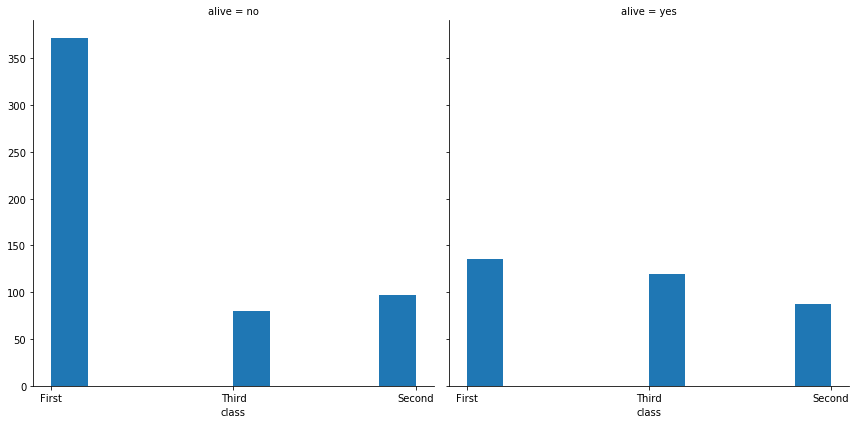

In [3]:
import matplotlib.pyplot as plt


g = sns.FacetGrid(titanic, col="alive", height=6)
g = g.map(plt.hist, "class")

Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона.
Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї.
Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [4]:
def Pirson(data, significant_level):
    keys = data.keys()
    hi2 = 0
    suma = sum(data[keys[1]])
    if sum(data[keys[1]]) != sum(data[keys[2]]):
        for i in range(len(data)):
            data[keys[1]][i] = (data[keys[1]][i]/suma) * sum(data[keys[2]])
    for i in range(len(data)):
        subtraction = ((data[keys[1]][i] - data[keys[2]][i])**2)/data[keys[2]][i]
        hi2 += subtraction
    r = len(data) - 1
    hi2_table = pd.read_excel('Pirson.xlsx').iloc[r, 1 if significant_level == 0.01 else 2]
    print("hi^2 = ", hi2)
    print("hi^2 табличне = ", hi2_table)
    if (hi2 > hi2_table):
        return "Статистична розбіжність"
    else:
        return "Статистичної розбіжності немає"
    

Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

Ознака  | Група 1 | Група 2  | 
------------- | ------------- |--------- |
Градація ознаки 1  | $n_{11}  $   | $n_{21}$   |
Градація ознаки 2  | $n_{12}$   | $n_{22}$   |
Градація ознаки 3  | $n_{13}$   | $n_{23}$   |

Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп.
Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [5]:
keys = table.keys()
suma1 = sum(table[keys[1]])
suma2 = sum(table[keys[2]])
table['% Alive'] = [table[keys[1]][i]/suma1 * 100 for i in range(len(table))]
table['% Not alive'] = [table[keys[2]][i]/suma2 * 100 for i in range(len(table))]
table

,Class,Alive,Not alive,% Alive,% Not alive
0,First class,136,80,39.766082,14.571949
1,Second class,87,97,25.438596,17.668488
2,Third class,119,372,34.795322,67.759563


In [7]:
Pirson(table, 0.05)

hi^2 =  345.94207041449295
hi^2 табличне =  6


'Статистична розбіжність'